# RAGAS : 성능평가

In [1]:
from dotenv import load_dotenv
load_dotenv()

True

## 평가용 데이터셋 준비
- Data Load

In [2]:
from langchain_community.document_loaders import PyPDFLoader

# 텍스트 파일을 문서로 로드
loader1 = PyPDFLoader("../data/squat1.pdf")  # 만약 파일의 이미지까지 불러오고 싶다면 extract_images=True 추가
doc1 = loader1.load()

loader2 = PyPDFLoader("../data/squat2.pdf")
doc2 = loader2.load()

loader3 = PyPDFLoader("../data/squat3.pdf")
doc3 = loader3.load()

loader4 = PyPDFLoader("../data/squat4.pdf")
doc4 = loader4.load()

- Data Setting

In [3]:
from datasets import Dataset

questions = [
    "스쿼트를 하면 무릎에 부담이 가는 이유는 무엇인가요?",
    "스쿼트 자세에서 척추 중립을 유지해야 하는 이유는 무엇인가요?",
    "스쿼트를 중장년층이 할 때 추천되는 방법은 무엇인가요?"
]

answers = [
    "스쿼트를 할 때 무릎에 큰 부하가 걸릴 수 있으며, 잘못된 자세나 근력 부족은 무릎 통증과 연골 손상을 유발할 수 있습니다.",
    "척추 중립을 유지하면 허리 부상을 예방하고, 에너지 전달이 효율적이므로 운동 효과가 극대화됩니다.",
    "중장년층은 다리를 넓게 벌리는 '와이드 스쿼트'를 통해 무릎에 가는 부담을 줄이고 안정감 있게 운동할 수 있습니다."
]

contexts = [
    [f"{doc1 + doc2}"],
    [f"{doc3}"],
    [f"{doc4}"]
]

ground_truths = [
    "무릎에 무리가 가지 않도록 정확한 자세로 수행해야 하며, 연골 손상을 피하려면 반복적 무릎 부하를 줄이는 것이 중요합니다.",
    "중립 척추를 유지하면 허리 부상을 방지하고 운동 효율이 향상됩니다.",
    "와이드 스쿼트는 근력이 약한 중장년층에게 안정성과 무릎 보호 효과를 제공합니다."
]

data = {
    'user_input': questions,
    'response': answers,
    'retrieved_contexts': contexts,
    'reference': ground_truths
}

dataset = Dataset.from_dict(data)
dataset

Dataset({
    features: ['user_input', 'response', 'retrieved_contexts', 'reference'],
    num_rows: 3
})

- Dataset Test

In [4]:
dataset[0]

{'user_input': '스쿼트를 하면 무릎에 부담이 가는 이유는 무엇인가요?',
 'response': '스쿼트를 할 때 무릎에 큰 부하가 걸릴 수 있으며, 잘못된 자세나 근력 부족은 무릎 통증과 연골 손상을 유발할 수 있습니다.',
 'retrieved_contexts': ['[Document(metadata={\'producer\': \'Microsoft: Print To PDF\', \'creator\': \'PyPDF\', \'creationdate\': \'2025-03-25T12:54:04+09:00\', \'author\': \'\', \'moddate\': \'2025-03-25T12:54:04+09:00\', \'title\': \'Microsoft Word - 8˝1\', \'source\': \'../data/squat1.pdf\', \'total_pages\': 1, \'page\': 0, \'page_label\': \'1\'}, page_content="스쿼트 하고 싶은데 무릎 아프다면… ‘이렇게’ 하세요 \\n \\n스쿼트는 하체 근력을 키움과 동시에 힙업 효과도 있는 좋은 운동이다. 하지만 앉았다 \\n일어나는 동작이 반복되는 만큼 평소 무릎이 약한 사람은 스쿼트를 하기 힘들어하는 경\\n우가 많다. 이럴 땐 몸 상태에 맞게 스쿼트 방법을 살짝 바꿔보는 게 좋다. \\n \\n◇‘미니 스쿼트’하면 무릎 부담 줄어 \\n무릎을 크게 굽혔다 펼 때마다 통증이 느껴진다면 무릎 사이 연골판이 약해진 상태일 가\\n능성이 크다. 이때 무리해서 일반 스쿼트를 하면 통증이 더욱 심해질 수 있다. 따라서 무\\n릎을 30도 정도로 조금만 굽히는 \'미니 스쿼트\'를 하는 게 좋다. 그럼 연골판에 가해지는 \\n부담을 줄이면서 하체 근육을 충분히 자극할 수 있다. 만약 운동 효과가 없다고 생각되\\n면 다리 각도가 아닌 한 세트에 반복하는 횟수를 조절한다. \\n \\n다만, 무릎 관절염 환자라면 스쿼트 자체를 하지 말아야 한다. 반복적으로 

- RAGAS evaluate

In [5]:
from ragas import evaluate
from ragas.metrics import faithfulness, answer_relevancy, context_precision, context_recall         # 4가지 평가 지표

result = evaluate(
    dataset=dataset,
    metrics=[
        context_precision,
        context_recall,
        answer_relevancy,
        faithfulness
    ]
)

result

Evaluating:   0%|          | 0/12 [00:00<?, ?it/s]

{'context_precision': 1.0000, 'context_recall': 1.0000, 'answer_relevancy': 0.8212, 'faithfulness': 0.6111}

In [6]:
result['context_precision'][0]

0.9999999999

In [ ]:
import plotly.graph_objects as go
import numpy as np

# 평가 항목
metrics = ['Context Precision', 'Context Recall', 'Answer Relevancy', 'Faithfulness']

# 각 질문별 점수
scores_q1 = [result['context_precision'][0], result['context_recall'][0], result['answer_relevancy'][0], result['faithfulness'][0]]
scores_q2 = [result['context_precision'][1], result['context_recall'][1], result['answer_relevancy'][1], result['faithfulness'][1]]
scores_q3 = [result['context_precision'][2], result['context_recall'][2], result['answer_relevancy'][2], result['faithfulness'][2]]

# 평균 계산
means = list(np.mean([scores_q1, scores_q2, scores_q3], axis=0))

# 그래프 그리기
fig = go.Figure(data=[
    go.Bar(name='질문 1', x=metrics, y=scores_q1, marker_color='mediumspringgreen'),
    go.Bar(name='질문 2', x=metrics, y=scores_q2, marker_color='mediumaquamarine'),
    go.Bar(name='질문 3', x=metrics, y=scores_q3, marker_color='mediumseagreen'),
    go.Bar(name='평균', x=metrics, y=means, marker_color='gray')
])

fig.update_layout(
    barmode='group',
    title="RAGAS 지표별 질문별 평가 결과",
    yaxis=dict(title="Score", range=[0, 1.1]),
    xaxis=dict(title="평가지표"),
    template="plotly_white"
)

fig.show()

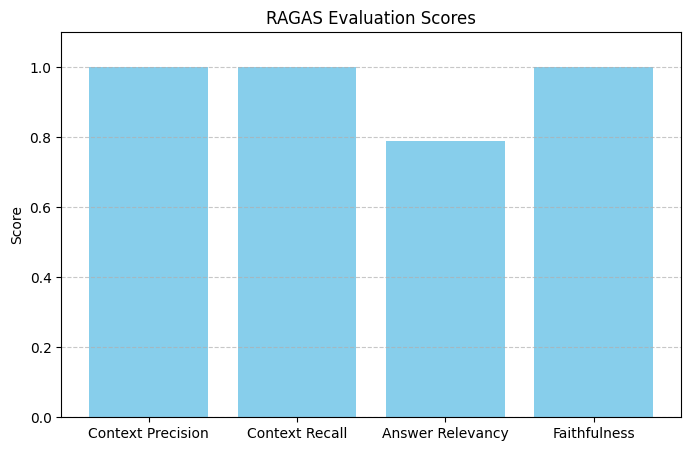

In [8]:
import matplotlib.pyplot as plt

# 결과 딕셔너리
scores = {
    'Context Precision': result['context_precision'][0],
    'Context Recall': result['context_recall'][0],
    'Answer Relevancy': result['answer_relevancy'][0],
    'Faithfulness': result['faithfulness'][0]
}

# 시각화
plt.figure(figsize=(8, 5))
plt.bar(scores.keys(), scores.values(), color='skyblue')
plt.ylim(0, 1.1)
plt.title("RAGAS Evaluation Scores")
plt.ylabel("Score")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()